Loading All need Libiries


In [6]:
#Importing all the required Libiries
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import rasterio
from rasterio.mask import mask
import fiona

Loading the data 

In [11]:
#Loading the datas
# Path of the shape file
path = "Shape_Data/local_unit.shp"
# Loading the shape file
gdf = gpd.read_file(path)

#Check the data
gdf.head(5)

,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,TAPLEJUNG,Maiwakhola,Gaunpalika,1,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,TAPLEJUNG,Meringden,Gaunpalika,1,"POLYGON ((87.51272 27.56894, 87.51255 27.56859..."
3,1,TAPLEJUNG,Mikwakhola,Gaunpalika,1,"POLYGON ((87.6885 27.70975, 87.68891 27.70938,..."
4,1,TAPLEJUNG,Phaktanglung,Gaunpalika,1,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."



Pre Data Processing

In [13]:
#Checking missing values or not
print(gdf.isnull().sum())

STATE_CODE    0
DISTRICT      0
GaPa_NaPa     0
Type_GN       0
Province      0
geometry      0
dtype: int64


Since all have zeor(0) which means our data is clean

Visualizating the data 

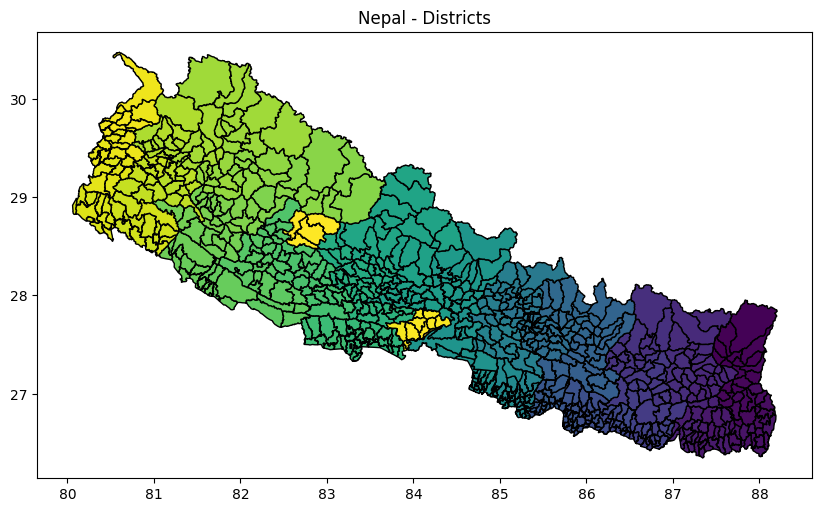

In [15]:
# Plotting the Nepal Data
gdf.plot(figsize=(10, 6), cmap="viridis", edgecolor="black")
plt.title("Nepal - Districts")
plt.show()